In [93]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
df=pd.read_csv("churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

no null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# dropping columns 
df.drop('customerID',axis=1,inplace=True)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# EDA

In [9]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

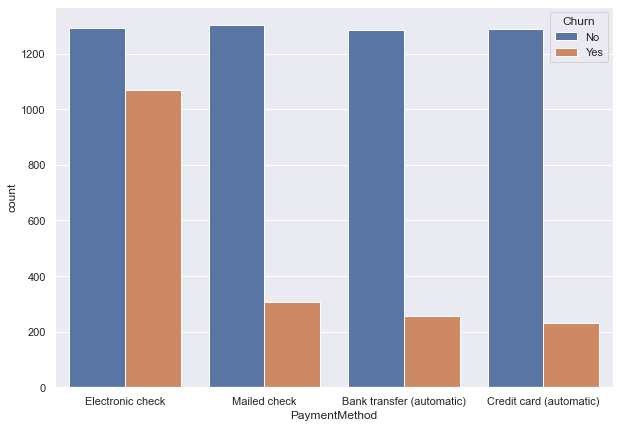

In [10]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='PaymentMethod',hue='Churn',data= df )

Churn rate is very high in those are having Electronic check of payment method and Its almost equal in other PaymentMethods

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

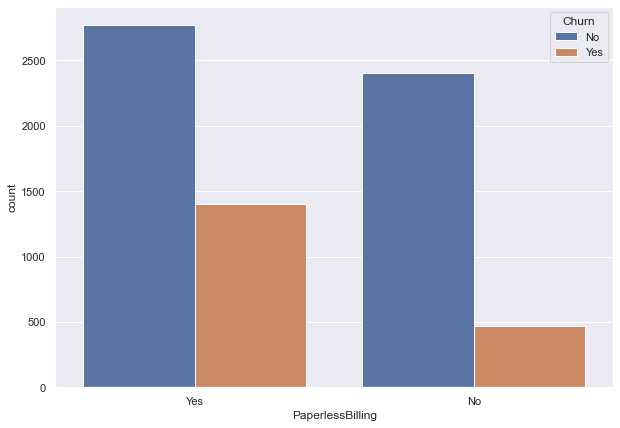

In [11]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='PaperlessBilling',hue='Churn',data= df )

The cx those are having PaperlessBilling, Churn rate is high in them

<AxesSubplot:xlabel='Contract', ylabel='count'>

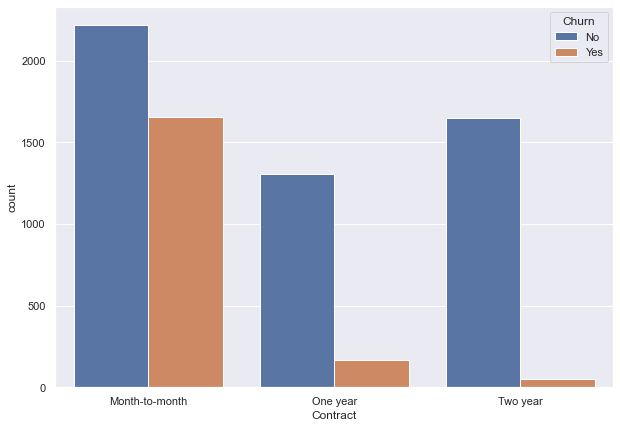

In [12]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Contract',hue='Churn',data= df )

Churn rate is very high in cx those on Month to Month contract and getting lower when cx taking for long time contract

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

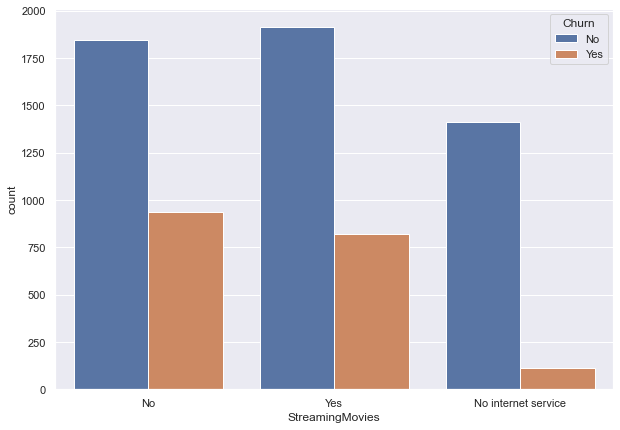

In [13]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='StreamingMovies',hue='Churn',data= df )

In service of StreamingMovies we can also notice cx those are not having, their Churn rate is little high than the cx those are having the service

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

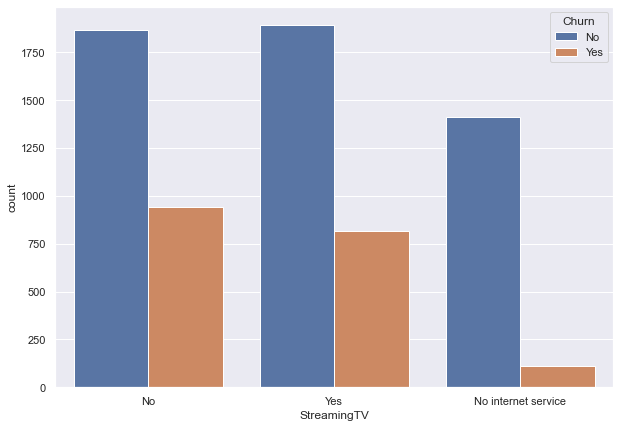

In [14]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='StreamingTV',hue='Churn',data= df )

In The servcie of StreamingTV Churn Rate little more for those not having the service of StreamingTV

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

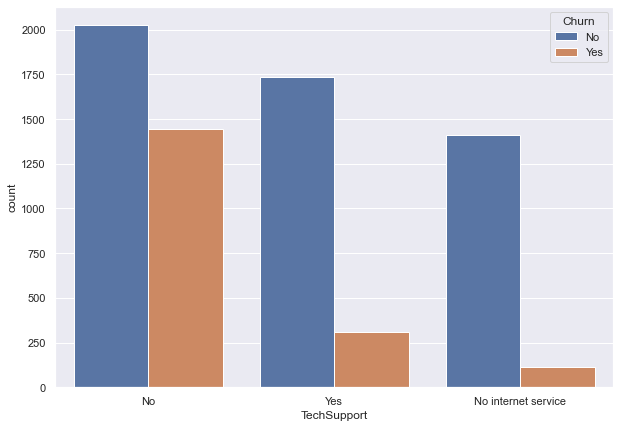

In [15]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='TechSupport',hue='Churn',data= df )

Churn is very high where cx doesn't have TechSupport

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

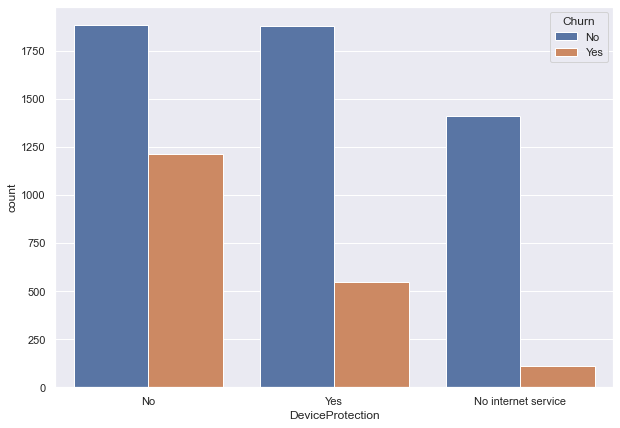

In [16]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='DeviceProtection',hue='Churn',data= df )

Churn is high where cx is not having Device Protection

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

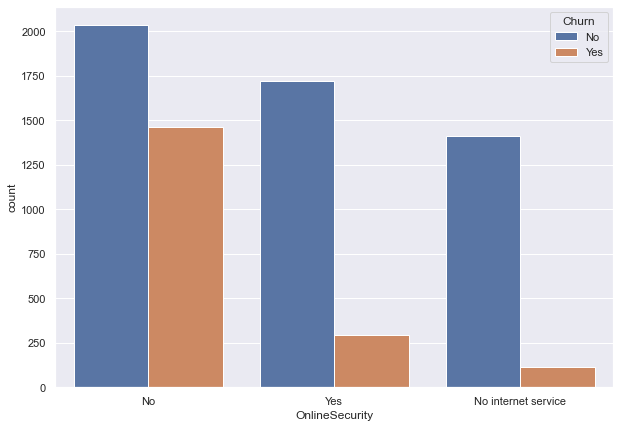

In [17]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='OnlineSecurity',hue='Churn',data= df )

Cx those are not having Online Security, Churn is very high, Churn is low where having Online Security and no internet service

<AxesSubplot:xlabel='InternetService', ylabel='count'>

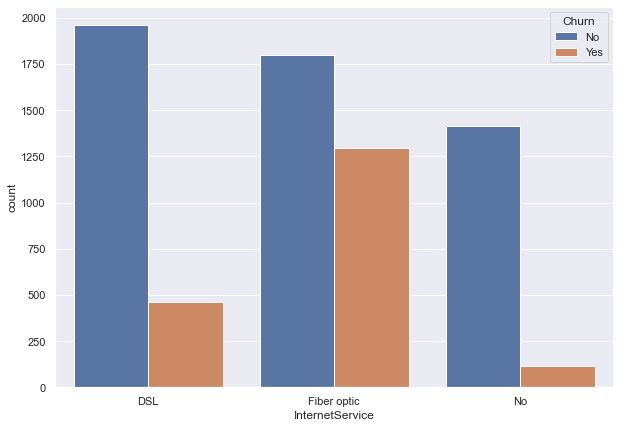

In [18]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='InternetService',hue='Churn',data= df )

Churn is very high in cx of Fiber Optic Internet service, Churn is very low where cx doesn't have Internet service

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

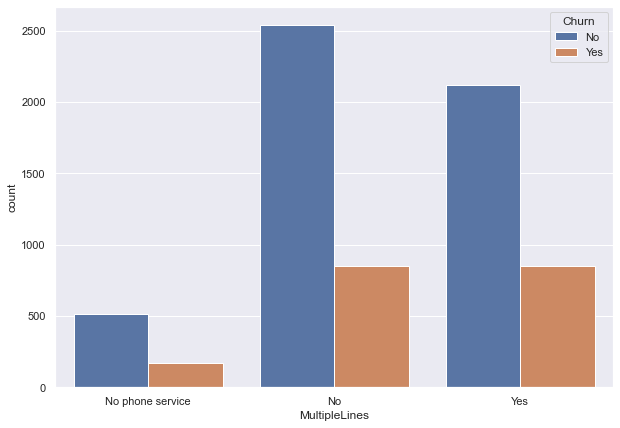

In [19]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='MultipleLines',hue='Churn',data= df )

Churn Percentage is high where cx having multiple lines. There are some cx as well, who doesn't have Phone service

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

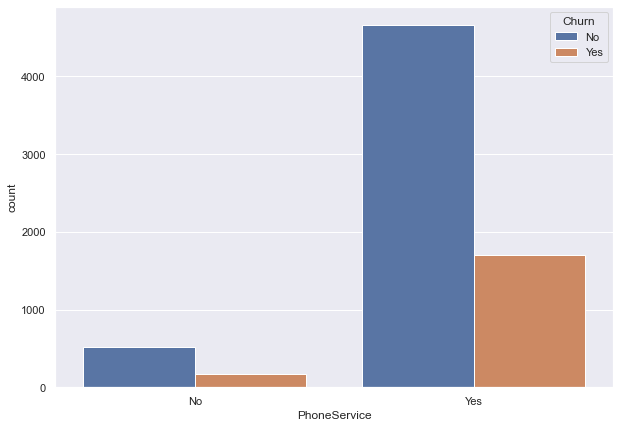

In [20]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='PhoneService',hue='Churn',data= df )

We can see most the cx having PhoneService, few of them not having PhoneService. Churn is also high in cx having PhoneService

<AxesSubplot:xlabel='tenure', ylabel='count'>

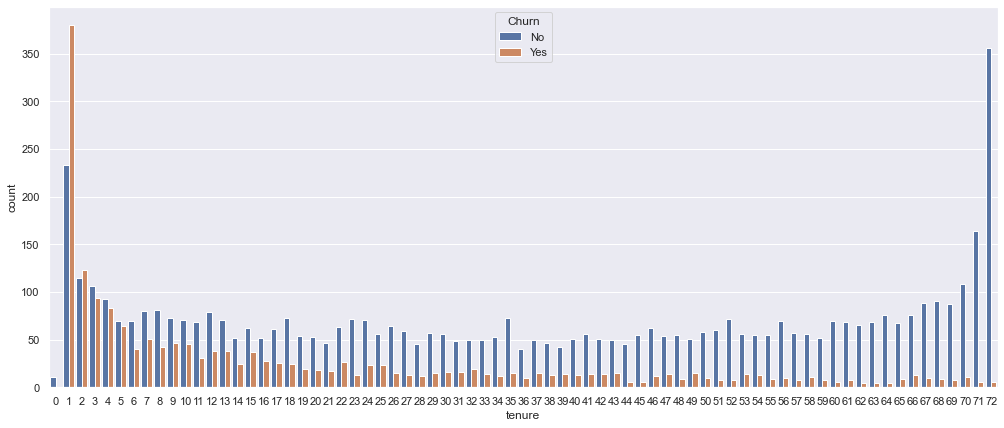

In [21]:
plt.figure(figsize=(17, 7))
sns. set(color_codes=True)
sns.countplot(x='tenure',hue='Churn',data= df )

Churn is high where tenure is less. where tenure is 1 churn very high. churn is high where tenure is 1 to 6. after that where tenure is increasing Churn is decreasing.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

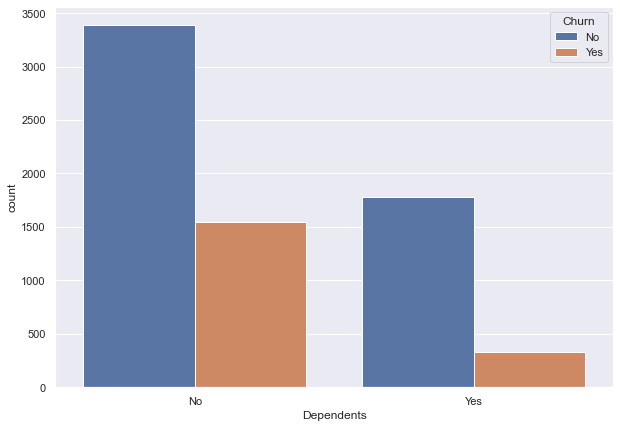

In [22]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Dependents',hue='Churn',data= df )

Churn is more in those cx, those not having dependents

<AxesSubplot:xlabel='Partner', ylabel='count'>

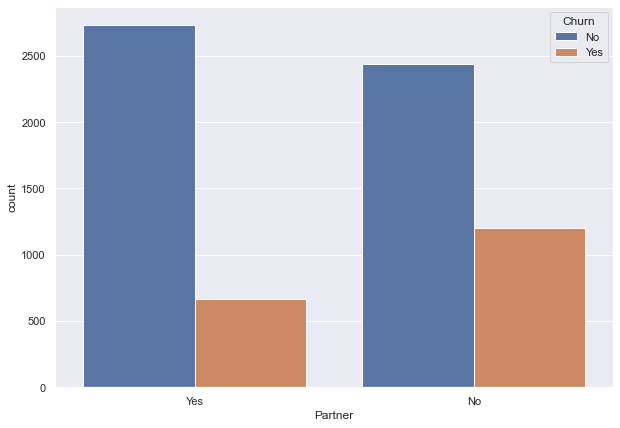

In [23]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Partner',hue='Churn',data= df )

Churn is less in Partner, more in customer those are not partner

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

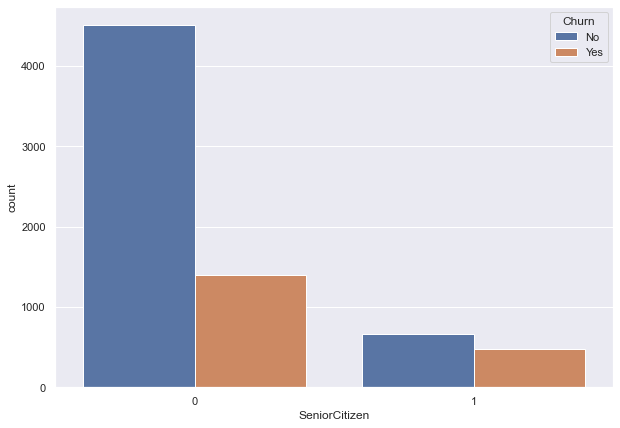

In [24]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='SeniorCitizen',hue='Churn',data= df )

Churn is less in SeniorCitizen, Must be we have less no customer in seniors

<AxesSubplot:xlabel='gender', ylabel='count'>

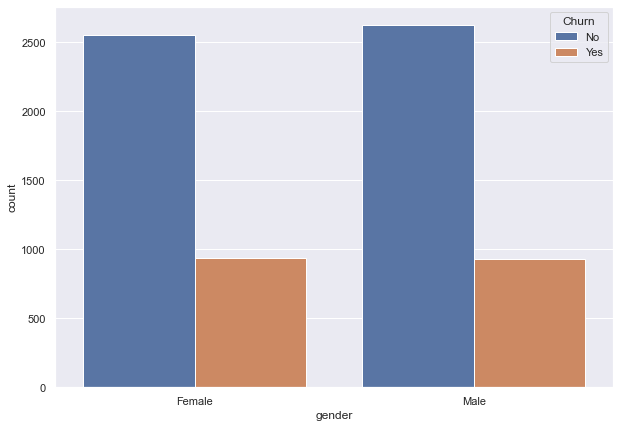

In [25]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='gender', hue='Churn',data= df )

Churn is almost same in all gender, male and female

# Label Encoder

In [27]:
# Total Charges should be numerical coverting that into numerical
le=LabelEncoder()
df['TotalCharges'] = le.fit_transform(df['TotalCharges'])

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,2505,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1466,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,157,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1400,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,925,Yes


<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

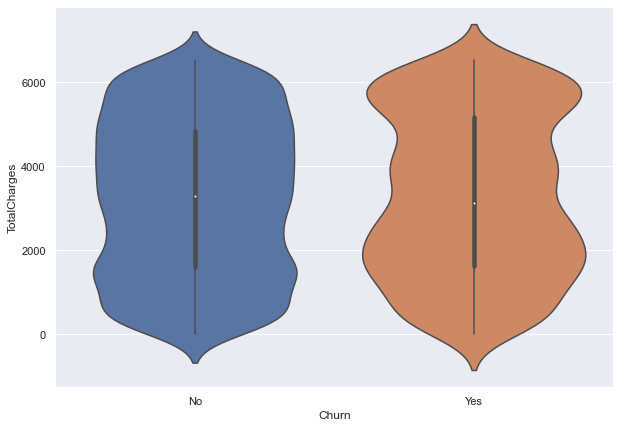

In [29]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Churn', y='TotalCharges',data=df )

Churn is little higher in cx those total bill around 2000 and 5800

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

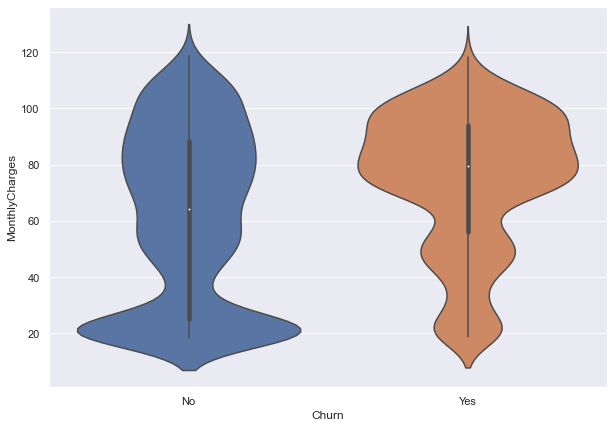

In [30]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Churn', y='MonthlyCharges',data=df )

We can notice Churn Rate high in cx their MonthlyCharges are 80 to 100, Churn is low their monthly Charges are 20 to 60

In [31]:
le=LabelEncoder()
categ_data = df.select_dtypes(exclude=['int64', 'float','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


Now we can see that ,all columns are converteed into numerical now

# Outliers

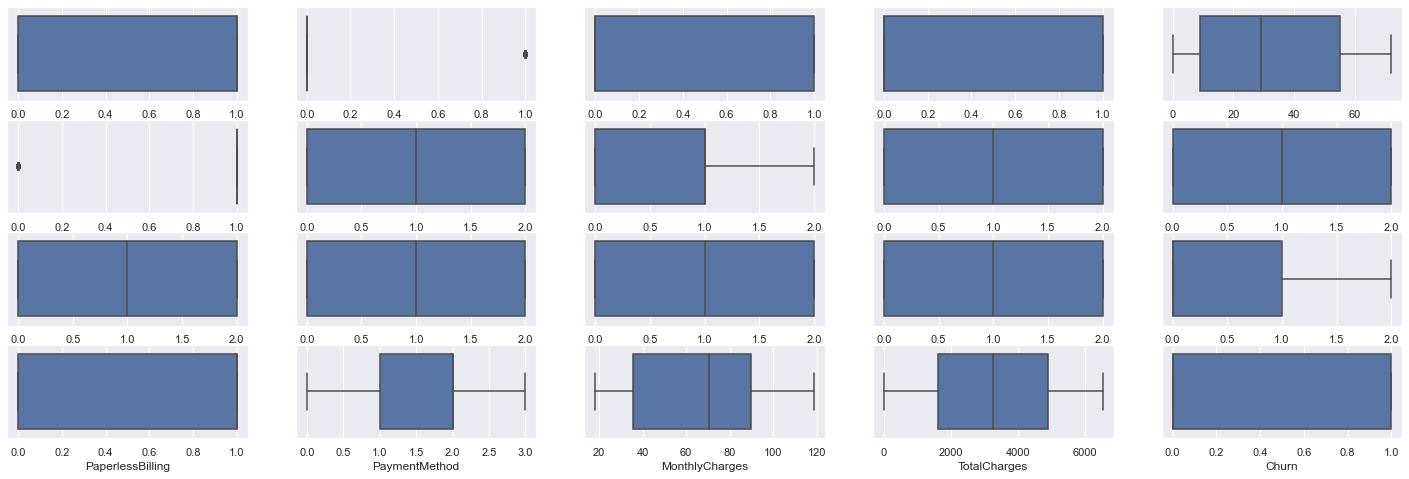

In [33]:
plt.figure(figsize=(25,10))
for o in enumerate(df):
    plt.subplot(5,5,o[0]+1)
    sns.boxplot(df[o[1]])

# skewness

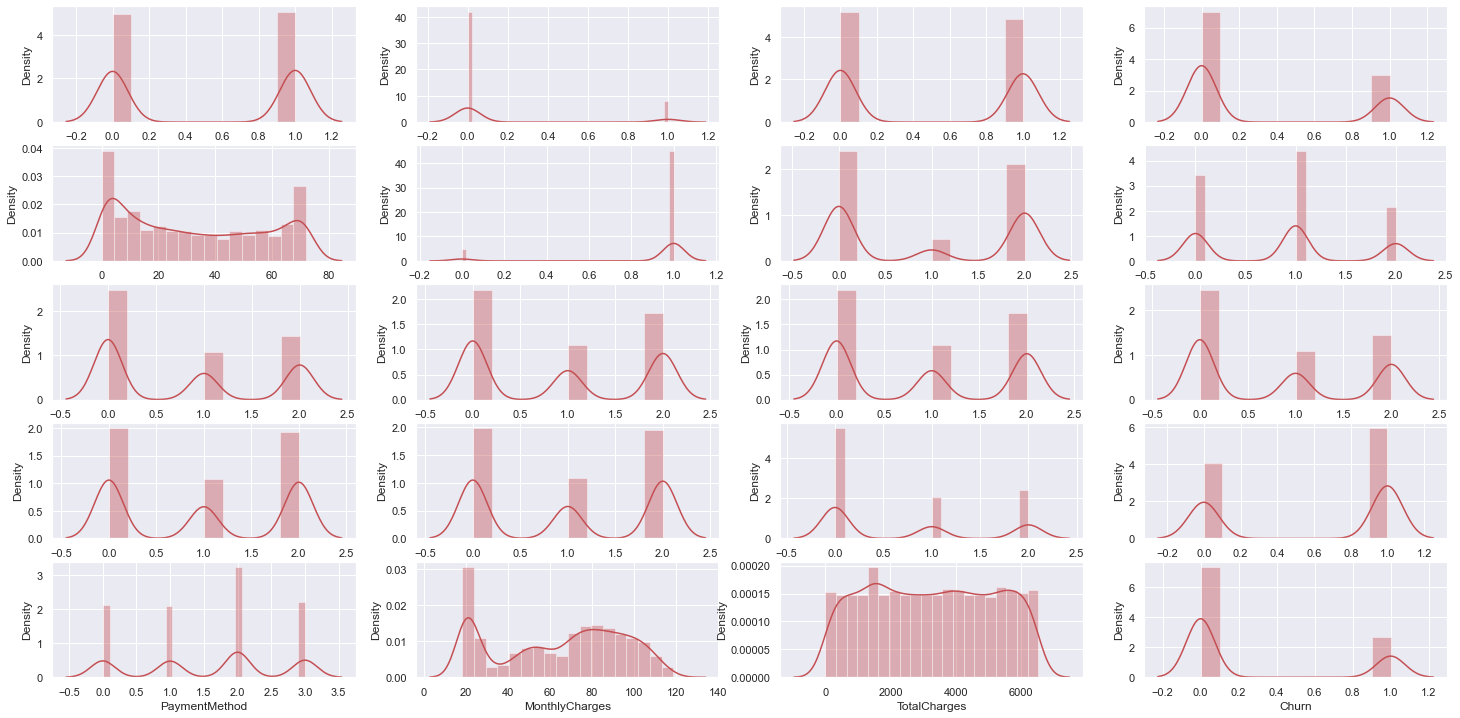

In [34]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')

In [35]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

# Splitting and scaling

In [36]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']

In [37]:
x.shape

(7043, 19)

In [38]:
y.shape

(7043,)

In [39]:
#Scaling
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [40]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [41]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,0.449599,0.903166,0.470254,0.436462,0.395002,0.453216,0.452222,0.398552,0.492688,0.496237,0.345236,0.592219,0.524776,0.462803,0.498896
std,0.500013,0.368612,0.499748,0.458110,0.341104,0.295752,0.474277,0.368898,0.429924,0.440081,0.439974,0.430775,0.442501,0.442545,0.416878,0.491457,0.356035,0.299403,0.289233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.171642,0.246401
50%,1.000000,0.000000,0.000000,0.000000,0.402778,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,1.000000,0.666667,0.518408,0.497550
75%,1.000000,0.000000,1.000000,1.000000,0.763889,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.666667,0.712438,0.750613
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Churn', ylabel='count'>

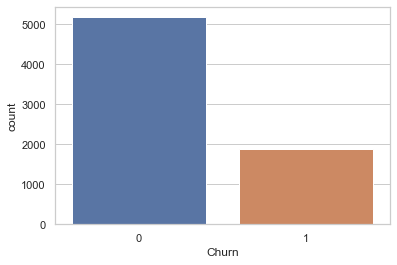

In [42]:
#sampling
sns.set_style("whitegrid")
sns.countplot(x="Churn", data=df)

In [44]:
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (7043,)
Resample Target dataset shape (10348,)


<AxesSubplot:xlabel='Churn', ylabel='count'>

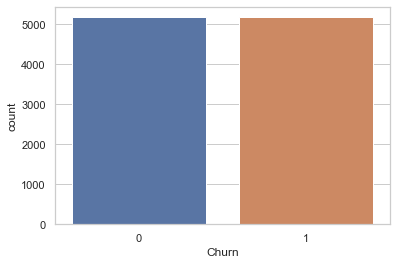

In [45]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [47]:
x_train.shape

(7554, 19)

In [48]:
x_test.shape

(2794, 19)

In [49]:
y_train.shape

(7554,)

In [50]:
y_test.shape

(2794,)

# Model Building

In [53]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))


cross validation score: 0.7538650845352256


In [56]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7634216177523264
[[1029  391]
 [ 270 1104]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1420
           1       0.74      0.80      0.77      1374

    accuracy                           0.76      2794
   macro avg       0.77      0.76      0.76      2794
weighted avg       0.77      0.76      0.76      2794

Training accuracy:: 0.7550966375430236
Test accuracy:: 0.7634216177523264


In [60]:
#Decision tree classifier
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7756190182659596


In [61]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7909806728704366
[[1130  290]
 [ 294 1080]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1420
           1       0.79      0.79      0.79      1374

    accuracy                           0.79      2794
   macro avg       0.79      0.79      0.79      2794
weighted avg       0.79      0.79      0.79      2794

Training accuracy:: 0.9989409584326184
Test accuracy:: 0.7909806728704366


In [62]:
#Kneighboursclassifier
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7866282808330005


In [63]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.7906227630637079
[[ 932  488]
 [  97 1277]]
              precision    recall  f1-score   support

           0       0.91      0.66      0.76      1420
           1       0.72      0.93      0.81      1374

    accuracy                           0.79      2794
   macro avg       0.81      0.79      0.79      2794
weighted avg       0.82      0.79      0.79      2794

Training accuracy:: 0.8415409054805401
Test accuracy:: 0.7906227630637079


In [64]:
#RandomForestClassifier
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8516710679620718


In [65]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8579098067287043
[[1201  219]
 [ 178 1196]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1420
           1       0.85      0.87      0.86      1374

    accuracy                           0.86      2794
   macro avg       0.86      0.86      0.86      2794
weighted avg       0.86      0.86      0.86      2794

Training accuracy:: 0.9988085782366958
Test accuracy:: 0.8579098067287043


# Ensemble Techniques

In [66]:
#ADA BOOST CLASSIFIER
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.8087623692989097


In [67]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.8146027201145312
[[1084  336]
 [ 182 1192]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1420
           1       0.78      0.87      0.82      1374

    accuracy                           0.81      2794
   macro avg       0.82      0.82      0.81      2794
weighted avg       0.82      0.81      0.81      2794

Training accuracy:: 0.8102991792427853
Test accuracy:: 0.8146027201145312


In [71]:
#BAGGING CLASSIFIER
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8285788504844934


In [72]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.8339298496778812
[[1216  204]
 [ 260 1114]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1420
           1       0.85      0.81      0.83      1374

    accuracy                           0.83      2794
   macro avg       0.83      0.83      0.83      2794
weighted avg       0.83      0.83      0.83      2794

Training accuracy:: 0.990601006089489
Test accuracy:: 0.8339298496778812


In [73]:
#Gradient Boosting classifier
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.832246610414973


In [74]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8432355046528275
[[1146  274]
 [ 164 1210]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1420
           1       0.82      0.88      0.85      1374

    accuracy                           0.84      2794
   macro avg       0.85      0.84      0.84      2794
weighted avg       0.85      0.84      0.84      2794

Training accuracy:: 0.8494837172359015
Test accuracy:: 0.8432355046528275


# Hyperparameter Tuning

In [75]:
adb=AdaBoostClassifier()
param_grid={
    'algorithm' : ['SAMME.R'],
    'n_estimators':[50,200],
    'learning_rate':[0.1,0.5],
     'random_state':[10]              
}

In [76]:
adb_grid=GridSearchCV(AdaBoostClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [77]:
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Accuracy after parameter tuning:: 0.8274874731567645


In [78]:
adb_grid.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.5,
 'n_estimators': 200,
 'random_state': 10}

In [79]:
best_param={
    'algorithm' : ['SAMME.R'],
    'n_estimators':[200],
    'learning_rate':[0.5],
     'random_state':[10]    
}

In [80]:
best_adb_grid=GridSearchCV(AdaBoostClassifier(),best_param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [81]:
best_adb_grid.fit(x_train,y_train)
best_adb_pred=best_adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_adb_pred))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Accuracy after parameter tuning:: 0.8274874731567645


# Report of AdaBoostClassifier

In [82]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_adb_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      1420
           1       0.80      0.87      0.83      1374

    accuracy                           0.83      2794
   macro avg       0.83      0.83      0.83      2794
weighted avg       0.83      0.83      0.83      2794



<AxesSubplot:>

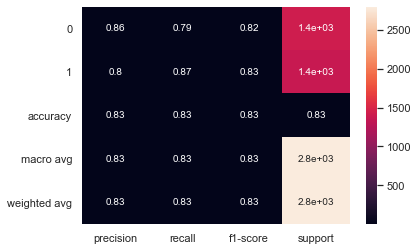

In [83]:
clsf_repo = classification_report(y_test,best_adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [85]:
print("roc auc score::",roc_auc_score(y_test, best_adb_pred))

roc auc score:: 0.8281833651106054


In [94]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_adb_pred, pos_label=1)

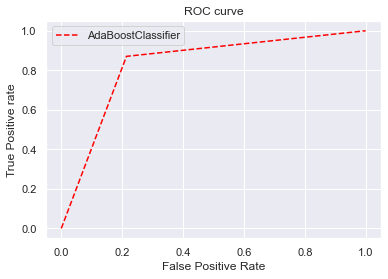

In [95]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='AdaBoostClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [96]:
joblib.dump(best_adb_grid.best_estimator_,'Customer Churn Analysis.obj')

['Customer Churn Analysis.obj']